# Reto- Entrega 2 - Clasificación-ensambles
## Equipo 30
### A01793933 - Christian Suárez Gil
### A01793999 - Nathalia Prada

____________

Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

from yellowbrick.classifier import confusion_matrix as cm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, power_transform, OneHotEncoder, MinMaxScaler  
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold,learning_curve,validation_curve, GridSearchCV
from sklearn.linear_model import LogisticRegression

## Lectura de Datos

En esta base de datos encontraras:

* Aguas subterraneas.
* Aguas superficiales.

In [2]:
Path = 'https://raw.githubusercontent.com/PosgradoMNA/Team30_ArtificialmenteInteligentes/main/Semana%209/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
a_subte = pd.read_csv(Path, index_col = 0, encoding='latin-1')

Path = 'https://raw.githubusercontent.com/PosgradoMNA/Team30_ArtificialmenteInteligentes/main/Semana%209/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'
a_super = pd.read_csv(Path, index_col = 0, encoding='latin-1')

### INDICADORES DE LA CALIDAD DEL AGUA SUPERFICIAL Y SUBTERRÁNEA

## Limpieza de base de datos

### Limpieza Datos Monitoreo de Aguas Subterraneas

#### Cambio del nombre de las columnas

Imprimimos las columnas del data set:

In [3]:
a_subte.columns

Index(['SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO',
       'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'CALIDAD_ALC',
       'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L', 'SDT_M_mg/L',
       'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L', 'CALIDAD_FLUO',
       'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC',
       'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS',
       'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L',
       'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN',
       'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='object')

Modificamos los nombres para simplificar la lectura de los datos,a continuación se presenta una tabla con la equivalencia de numbres y la descripción de cada columna del dataset:

| **Nombre**           | **Nuevo Nombre**  | **Descripción**                                                                                                                                    |
|----------------------|-------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| SITIO                | sitio             | Nombre del sitio de muestreo                                                                                                                       |
| ORGANISMO_DE_CUENCA  | organismo_cuenca  | Nombre del Organismo de Cuenca de agua donde se localiza el sitio de monitoreo                                                                     |
| ESTADO               | estado            | Estado donde se encuentra el sitio de muestreo                                                                                                     |
| MUNICIPIO            | municipio         | Municipio donde se encuentra el sitio de muestreo                                                                                                  |
| ACUIFERO             | acuifero          | Acuifero donde se encuentra el sitio de muestreo                                                                                                   |
| SUBTIPO              | subtipo           | Subtipo de cuerpo de agua donde se encuentra el sitio de muestreo                                                                                  |
| LONGITUD             | longitud          | Coordenada de longitud                                                                                                                             |
| LATITUD              | latitud           | Coordenada de latitud                                                                                                                              |
| PERIODO              | periodo           | Anio o periodo en que se realizo el muestreo                                                                                                       |
| ALC_mg/L             | alc               | Valor de Alcalinidad Total, en miligramos por litro                                                                                                |
| CALIDAD_ALC          | calidad_alc       | Clasificacion de la calidad del agua de acuerdo con el indicador Alcalinidad Total                                                                 |
| CONDUCT_mS/cm        | conduct           | Valor de Conductividad en microSiemens por centimetro                                                                                              |
| CALIDAD_CONDUC       | calidad_conduct   | Clasificacion de la calidad del agua de acuerdo con el indicador Conductividad                                                                     |
| SDT_mg/L             | sdt               | Valor de Solidos Disueltos Totales, en miligramos por litro                                                                                        |
| SDT_M_mg/L           | sdt_m             | Valor de Solidos Disueltos Totales-Medidos, en miligramos por litro                                                                                |
| CALIDAD_SDT_ra       | calidad_sdt_ra    | Clasificacion de la calidad del agua de acuerdo con el indicador de los Solidos Disueltos Totales (Riego agricola)                                 |
| CALIDAD_SDT_salin    | calidad_sdt_salin | Clasificacion de la calidad del agua de acuerdo con el indicador de los Solidos Disueltos Totales (Salinizacion)                                   |
| FLUORUROS_mg/L       | fluoruros         | Valor de Fluoruros Totales (F-), en miligramos por litro                                                                                           |
| CALIDAD_FLUO         | calidad_fluo      | Clasificacion de la calidad del agua de acuerdo con el indicador Fluoruros Totales                                                                 |
| DUR_mg/L             | dur               | Valor de Dureza Total, en miligramos por litro                                                                                                     |
| CALIDAD_DUR          | calidad_dur       | Clasificacion de la calidad del agua de acuerdo con el indicador Dureza Total                                                                      |
| COLI_FEC_NMP/100_mL  | coli_fec          | Valor de Coliformes Fecales, en Numero Mas Probable por 100 mililitros                                                                             |
| CALIDAD_COLI_FEC     | calidad_coli_fec  | Clasificacion de la calidad del agua de acuerdo con el indicador Coliformes Fecales                                                                |
| N_NO3_mg/L           | n_no3             | Valor de Nitrogeno de Nitratos, en miligramos por litro                                                                                            |
| CALIDAD_N_NO3        | calidad_n_no3     | Clasificacion de la calidad del agua de acuerdo con el indicador Nitrogeno de Nitratos                                                             |
| AS_TOT_mg/L          | as                | Valor de Arsenico Total, en miligramos por litro                                                                                                   |
| CALIDAD_AS           | calidad_as        | Clasificacion de la calidad del agua de acuerdo con el indicador Arsenico Total                                                                    |
| CD_TOT_mg/L          | cd                | Valor de Cadmio Total, en miligramos por litro                                                                                                     |
| CALIDAD_CD           | calidad_cd        | Clasificacion de la calidad del agua de acuerdo con el indicador Cadmio Total                                                                      |
| CR_TOT_mg/L          | cr                | Valor de Cromo Total, en miligramos por litro                                                                                                      |
| CALIDAD_CR           | calidad_cr        | Clasificacion de la calidad del agua de acuerdo con el indicador Cromo Total                                                                       |
| HG_TOT_mg/L          | hg                | Valor de Mercurio Total, en miligramos por litro                                                                                                   |
| CALIDAD_HG           | calidad_hg        | Clasificacion de la calidad del agua de acuerdo con el indicador Mercurio Total                                                                    |
| PB_TOT_mg/L          | pb                | Valor de Plomo Total, en miligramos por litro                                                                                                      |
| CALIDAD_PB           | calidad_pb        | Clasificacion de la calidad del agua de acuerdo con el indicador Plomo Total                                                                       |
| MN_TOT_mg/L          | mn                | Valor de Manganeso Total, en miligramos por litro                                                                                                  |
| CALIDAD_MN           | calidad_mn        | Clasificacion de la calidad del agua de acuerdo con el indicador Manganeso Total                                                                   |
| FE_TOT_mg/L          | fe                | Valor de Hierro Total, en miligramos por litro                                                                                                     |
| CALIDAD_FE           | calidad_fe        | Clasificacion de la calidad del agua de acuerdo con el indicador Hierro Total                                                                      |
| SEMAFORO             | semaforo          | Indica el nivel de contaminacion de acuerdo a los contaminantes presentes                                                                          |
| CONTAMINANTES        | contaminantes     | Contaminantes presentes en incumplimiento (Contaminados)                                                                                           |
| CUMPLE_CON_ALC       | cumple_alc        |  Indica si cumple con la calidad de Baja, Media, o Alta para el Indicador Alcalinidad Total                                                        |
| CUMPLE_CON_COND      | cumple_cond       |  Indica si cumple con la calidad de Excelente para riego, Buena para riego, o Permisible para riego, para el Indicador Conductividad.              |
| CUMPLE_CON_SDT_ra    | cumple_sdt_ra     | Indica si cumple con la calidad de Excelente para riego, Cultivos sensibles o Cultivos con manejo especial, para el Indicador SDT (Riego agrícola) |
| CUMPLE_CON_SDT_salin | cumple_sdt_salin  | Indica si cumple con la calidad de Potable - Dulce o Ligeramente salobres, para el Indicador Solidos Disueltos Totales (Salinización)              |
| CUMPLE_CON_FLUO      | cumple_fluo       | Indica si cumple con la calidad de Baja, Media, o Potable - Optima, para el Indicador Fluoruros Totales                                            |
| CUMPLE_CON_DUR       | cumple_dur        | Indica si cumple con la calidad de Potable - Suave, Potable - Moderadamente suave, o Potable - Dura, para el Indicador Dureza Total.               |
| CUMPLE_CON_CF        | cumple_cf         | Indica si cumple con la calidad de Potable - Excelente, o Buena calidad, Aceptable, para el Indicador Coliformes Fecales                           |
| CUMPLE_CON_NO3       | cumple_no3        | Indica si cumple con la calidad de Potable - Excelente o Potable - Buena calidad, para el Indicador Nitrogeno de Nitratos                          |
| CUMPLE_CON_AS        | cumple_as         | Indica si cumple con la calidad de Potable - Excelente o Apta como FAAP, para el Indicador Arsenico Total                                          |
| CUMPLE_CON_CD        | cumple_cd         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Cadmio Total                                                             |
| CUMPLE_CON_CR        | cumple_cr         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Cromo Total                                                              |
| CUMPLE_CON_HG        | cumple_hg         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Mercurio Total                                                           |
| CUMPLE_CON_PB        | cumple_pb         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Plomo Total                                                              |
| CUMPLE_CON_MN        | cumple_mn         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Manganeso Total                                                          |
| CUMPLE_CON_FE        | cumple_fe         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Hierro Total                                                             |


In [4]:
columnas = ['sitio','organismo_cuenca','estado','municipio','acuifero','subtipo','longitud','latitud','periodo','alc','calidad_alc',
'conduct','calidad_conduct','sdt','sdt_m','calidad_sdt_ra','calidad_sdt_salin','fluoruros','calidad_fluo','dur','calidad_dur','coli_fec','calidad_coli_fec',
'n_no3','calidad_n_no3','as','calidad_as','cd','calidad_cd','cr','calidad_cr','hg','calidad_hg','pb','calidad_pb','mn','calidad_mn','fe','calidad_fe','semaforo',
'contaminantes','cumple_alc','cumple_cond','cumple_sdt_ra','cumple_sdt_salin','cumple_fluo','cumple_dur','cumple_cf','cumple_no3','cumple_as','cumple_cd','cumple_cr',
'cumple_hg','cumple_pb','cumple_mn','cumple_fe']

In [5]:
a_subte.columns = columnas

#### visualización de datos faltantes

La matriz de nulidad de $msno.matrix$ es una pantalla densa en información que permite identificar rápidamente patrones en la completitud de los datos.

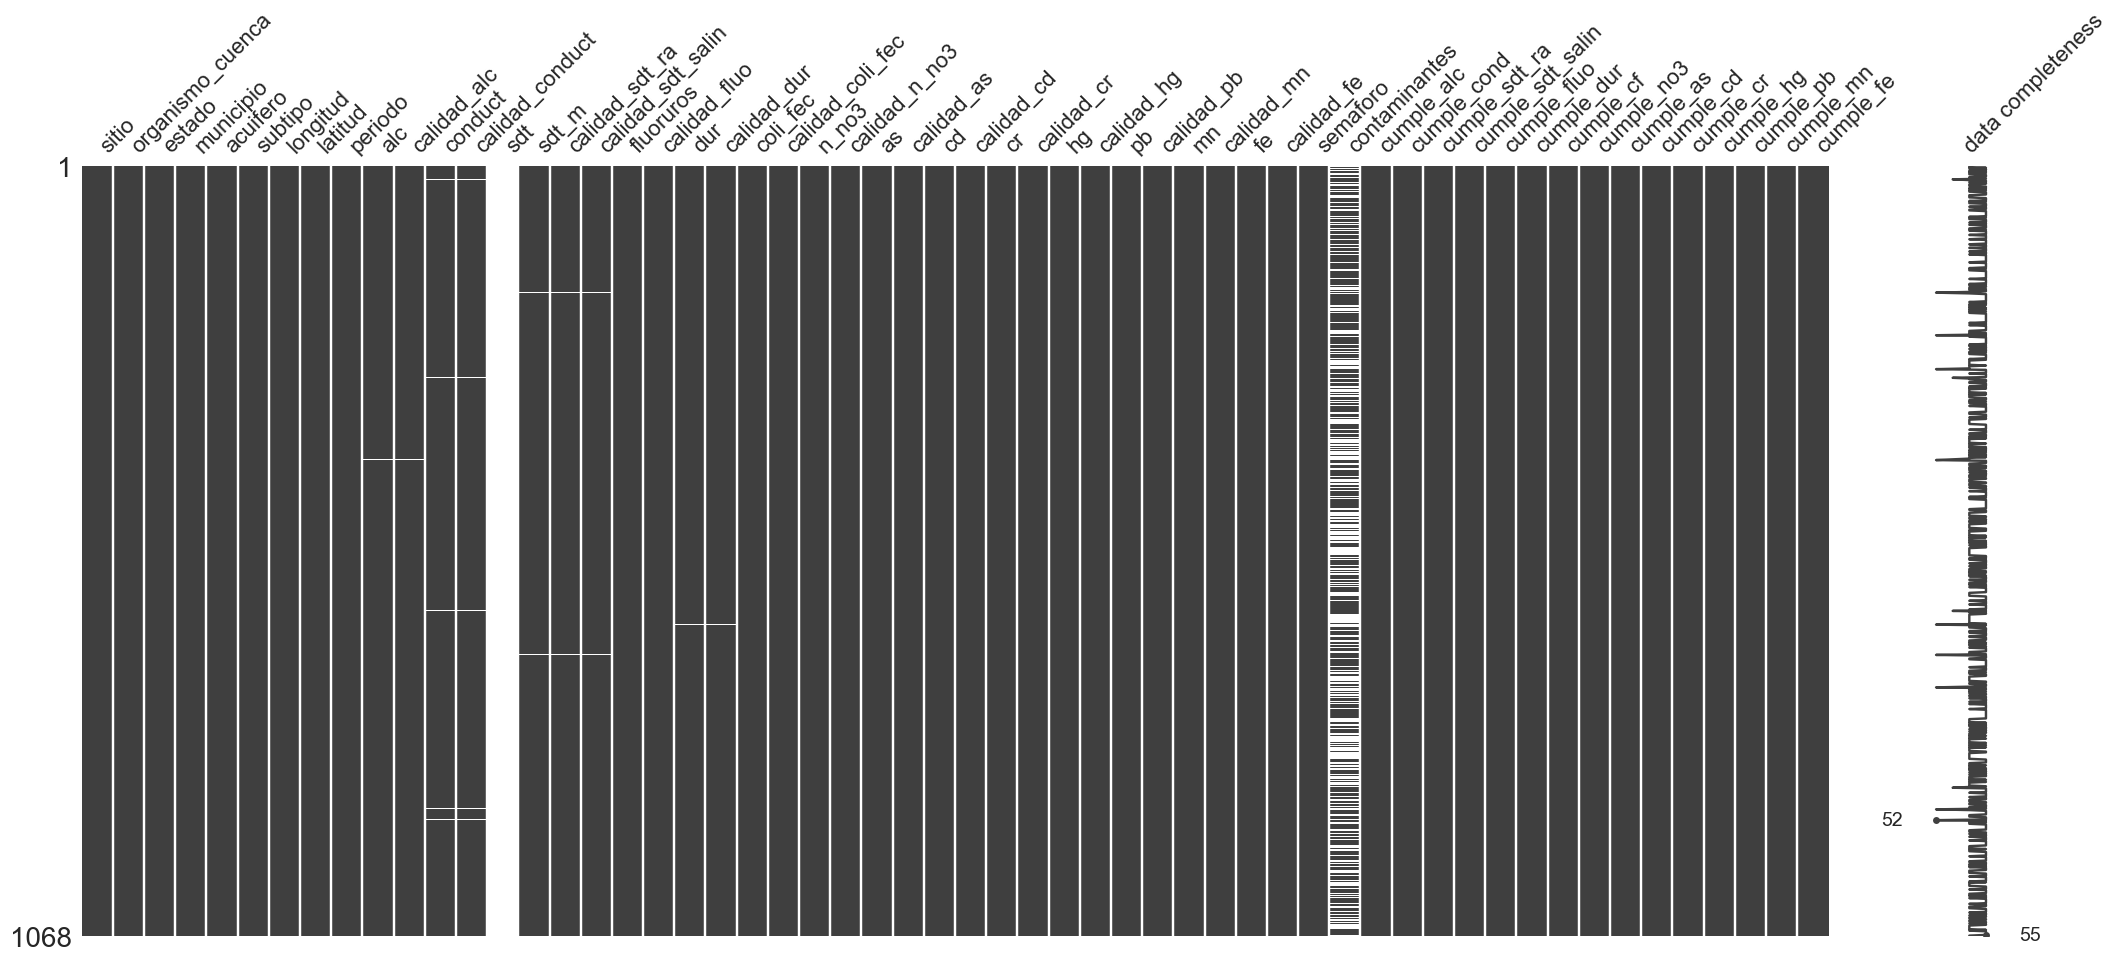

In [6]:
msno.matrix(a_subte, labels=True)
plt.show()

En la visualización de datos faltantes, podemos ver que una de las columnas con más datos faltantes es 'contaminantes', sin embargo es esta columna los campos vacios nos indican esa muestra no tiene contaminantes, por lo que se decide llenar los campos faltantes con la frase "sin contaminantes":

In [7]:
a_subte["contaminantes"].fillna("sin contaminantes", inplace = True)

In [8]:
a_subte.isna().mean()

sitio                0.000000
organismo_cuenca     0.000000
estado               0.000000
municipio            0.000000
acuifero             0.000000
subtipo              0.000000
longitud             0.000000
latitud              0.000000
periodo              0.000000
alc                  0.003745
calidad_alc          0.003745
conduct              0.005618
calidad_conduct      0.005618
sdt                  1.000000
sdt_m                0.001873
calidad_sdt_ra       0.001873
calidad_sdt_salin    0.001873
fluoruros            0.000000
calidad_fluo         0.000000
dur                  0.000936
calidad_dur          0.000936
coli_fec             0.000000
calidad_coli_fec     0.000000
n_no3                0.000936
calidad_n_no3        0.000936
as                   0.000000
calidad_as           0.000000
cd                   0.000000
calidad_cd           0.000000
cr                   0.000000
calidad_cr           0.000000
hg                   0.000000
calidad_hg           0.000000
pb        

Al revisar la media de los datos vemos que una de las columnas tiene el 100% de sus datos faltantes, el siguiente código elimina las columnas que tienen más de un determinado porcentaje de datos faltantes:

In [9]:
a_subte.drop(a_subte.columns[a_subte.isnull().mean() >= 0.3], inplace=True, axis=1)

Una vez eliminadas las columnas con más de determinado porcentaje de datos faltantes, se eliminan las filas con datos faltantes:

In [10]:
a_subte.dropna(inplace = True, axis = 0)
a_subte.shape

(1054, 55)

#### Columnas con valores "<number"

Realizamos una descripción inicial de los datos:

In [11]:
a_subte.describe(include = 'all')

,sitio,organismo_cuenca,estado,municipio,acuifero,subtipo,longitud,latitud,periodo,alc,...,cumple_dur,cumple_cf,cumple_no3,cumple_as,cumple_cd,cumple_cr,cumple_hg,cumple_pb,cumple_mn,cumple_fe
count,1054,1054,1054,1054,1054,1054,1054.000000,1054.000000,1054.0,1054.000000,...,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054
unique,1052,13,32,447,272,8,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,POZO VILLA UNION,CUENCAS CENTRALES DEL NORTE,DURANGO,LA PAZ,PENINSULA DE YUCATAN,POZO,NaN,NaN,NaN,NaN,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,2,231,119,26,119,1025,NaN,NaN,NaN,NaN,...,829,993,974,929,1052,1039,1053,1042,969,920
mean,NaN,NaN,NaN,NaN,NaN,NaN,-101.848270,23.161796,2020.0,234.695266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6.697568,3.875005,0.0,111.147849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,-116.664250,14.561150,2020.0,26.640000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,-105.385170,20.224857,2020.0,164.257500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,-102.170665,22.640705,2020.0,215.825000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,-98.971268,25.508770,2020.0,292.930000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hay columnas en las cuales el valor más frecuente del data set es "<number", esto se debe a que para los valores muy pequeños se decidió usar esta nomenclatura en el data set. En estas, reemplazaremos dichos valores string por 0, y cambiamos el tipo de dato a flotante: 

In [12]:
entro=0
for i in a_subte.columns:
    mask = a_subte[i].astype(str).str.match(r'^\<')
    a_subte[i].mask(mask,0,inplace=True)
    if mask.any():
        a_subte[i]=a_subte[i].astype('float')           

In [13]:
a_subte.describe(include = 'all')

,sitio,organismo_cuenca,estado,municipio,acuifero,subtipo,longitud,latitud,periodo,alc,...,cumple_dur,cumple_cf,cumple_no3,cumple_as,cumple_cd,cumple_cr,cumple_hg,cumple_pb,cumple_mn,cumple_fe
count,1054,1054,1054,1054,1054,1054,1054.000000,1054.000000,1054.0,1054.000000,...,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054
unique,1052,13,32,447,272,8,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,POZO VILLA UNION,CUENCAS CENTRALES DEL NORTE,DURANGO,LA PAZ,PENINSULA DE YUCATAN,POZO,NaN,NaN,NaN,NaN,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,2,231,119,26,119,1025,NaN,NaN,NaN,NaN,...,829,993,974,929,1052,1039,1053,1042,969,920
mean,NaN,NaN,NaN,NaN,NaN,NaN,-101.848270,23.161796,2020.0,234.695266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6.697568,3.875005,0.0,111.147849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,-116.664250,14.561150,2020.0,26.640000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,-105.385170,20.224857,2020.0,164.257500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,-102.170665,22.640705,2020.0,215.825000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,-98.971268,25.508770,2020.0,292.930000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Revisión de tipos de datos

Ahora todas las variables numericas parecen tener el tipo correcto de datos, exeptuando sdt_m que contiene el "Valor de Solidos Disueltos Totales-Medidos, en miligramos por litro" y periodo:

In [14]:
a_subte.dtypes

sitio                 object
organismo_cuenca      object
estado                object
municipio             object
acuifero              object
subtipo               object
longitud             float64
latitud              float64
periodo                int64
alc                  float64
calidad_alc           object
conduct              float64
calidad_conduct       object
sdt_m                 object
calidad_sdt_ra        object
calidad_sdt_salin     object
fluoruros            float64
calidad_fluo          object
dur                  float64
calidad_dur           object
coli_fec             float64
calidad_coli_fec      object
n_no3                float64
calidad_n_no3         object
as                   float64
calidad_as            object
cd                   float64
calidad_cd            object
cr                   float64
calidad_cr            object
hg                   float64
calidad_hg            object
pb                   float64
calidad_pb            object
mn            

In [15]:
a_subte['sdt_m']=a_subte['sdt_m'].astype('float')  
a_subte['periodo']=a_subte['periodo'].astype('float') 

#### Columnas con único valor

Las columnas con un único valor no agregan valor al dataframe por lo que se eliminan del Data Frame:

In [16]:
a_subte.columns[a_subte.nunique()==1]

Index(['periodo'], dtype='object')

In [17]:
a_subte.drop(a_subte.columns[a_subte.nunique()==1], inplace=True, axis=1)

seleccionamos las variables numéricas y graficamos su correlación:

### Encoding de la variable objetivo

In [18]:
a_subte['semaforo'].replace({'Verde':2,'Amarillo':1,'Rojo':0},inplace=True)
a_subte['semaforo']

CLAVE
DLAGU6         2
DLAGU6516      2
DLAGU7         0
DLAGU9         2
DLBAJ107       0
              ..
OCRBR5101M1    0
OCRBR5102M1    0
OCRBR5105M2    0
OCRBR5106M1    2
OCRBR5109M1    2
Name: semaforo, Length: 1054, dtype: int64

## Selección inicial de variables y partición del data set

Debido a que algunas de las variables presentan alta dimensionalidad, como la variable "sitio" que tienen 1067 valores únicos, y a que muchas de las variables están correlacionas, como las variables sustancia y calidad de la sustancia (ejemplo: alc, calidad_alc) realizaremos una selección inicial de variables buscando resolver estos inconvenientes, manteniendo la mayor de la información disponible.

Cuando la misma variable esté como categórica y numérica, dejaremos la numérica, con el objetivo de tratar de que nuestros modelos de arboles encuentren unos puntos de corte quizás más óptimos que los que se tienen actualmente.

In [19]:
columnas_usar =['organismo_cuenca','subtipo','longitud', 'latitud','alc','conduct','sdt_m','fluoruros','dur','coli_fec','n_no3','as','cd','cr','hg','pb',
'mn','fe','semaforo']
categorical_features = ['organismo_cuenca','subtipo']
numerical_features = ['longitud', 'latitud','alc','conduct','sdt_m','fluoruros','dur','coli_fec','n_no3','as','cd','cr','hg','pb',
'mn','fe']
df_dep = a_subte[categorical_features + numerical_features + ['semaforo']]
df_dep.head()

,organismo_cuenca,subtipo,longitud,latitud,alc,conduct,sdt_m,fluoruros,dur,coli_fec,n_no3,as,cd,cr,hg,pb,mn,fe,semaforo
CLAVE,,,,,,,,,,,,,,,,,,,
DLAGU6,LERMA SANTIAGO PACIFICO,POZO,-102.02210,22.20887,229.990,940.0,603.6,0.9766,213.7320,0.0,4.184656,0.0161,0.0,0.000,0.0,0.0,0.0,0.0891,2
DLAGU6516,LERMA SANTIAGO PACIFICO,POZO,-102.20075,21.99958,231.990,608.0,445.4,0.9298,185.0514,0.0,5.750110,0.0134,0.0,0.000,0.0,0.0,0.0,0.0000,2
DLAGU7,LERMA SANTIAGO PACIFICO,POZO,-102.28801,22.36685,204.920,532.0,342.0,1.8045,120.7190,0.0,1.449803,0.0370,0.0,0.000,0.0,0.0,0.0,0.0000,0
DLAGU9,LERMA SANTIAGO PACIFICO,POZO,-102.29449,22.18435,327.000,686.0,478.6,1.1229,199.8790,0.0,1.258597,0.0154,0.0,0.005,0.0,0.0,0.0,0.0000,2
DLBAJ107,PENINSULA DE BAJA CALIFORNIA,POZO,-110.24480,23.45138,309.885,1841.0,1179.0,0.2343,476.9872,291.0,15.672251,0.0000,0.0,0.000,0.0,0.0,0.0,0.0000,0


Algunas variables númericas no tienen el formato correcto, por lo cual ahora las transformaremos

In [20]:
df_dep[numerical_features] = df_dep[numerical_features].apply(pd.to_numeric)
df_dep.dtypes

C:\Users\Prada\AppData\Local\Temp\ipykernel_4704\399142393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep[numerical_features] = df_dep[numerical_features].apply(pd.to_numeric)


organismo_cuenca     object
subtipo              object
longitud            float64
latitud             float64
alc                 float64
conduct             float64
sdt_m               float64
fluoruros           float64
dur                 float64
coli_fec            float64
n_no3               float64
as                  float64
cd                  float64
cr                  float64
hg                  float64
pb                  float64
mn                  float64
fe                  float64
semaforo              int64
dtype: object

Para evitar el filtrado de información, en esta etapa seleccionaremos nuestras variables predictoras X y nuestra variable target Y, y partiremos nuestro data set en entrenamiento y testing.
Adicionalmente, realizaremos la partición de los datos de manera estratificada, para garantizar que los % de participación de cada categoría se mantengan y las métricas sean lo más reales posibles en cada conjunto.

In [21]:
X = df_dep.drop('semaforo',axis=1)
y = df_dep['semaforo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=1,stratify=y)

Revisemos que si se haya mantenido la participacion de cada clase en ambos data set

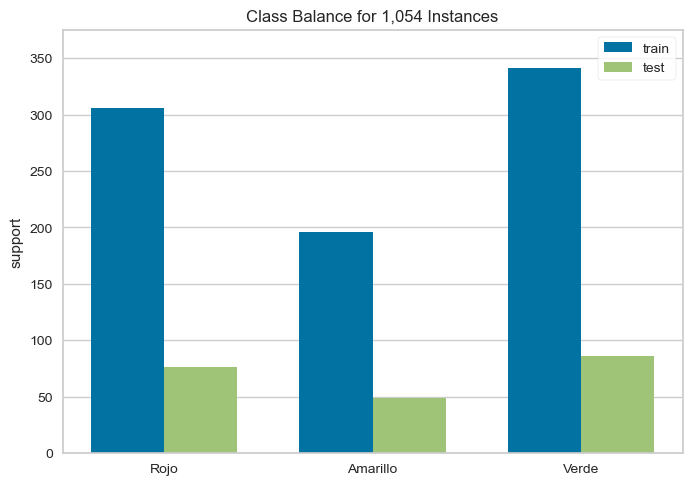

<AxesSubplot:title={'center':'Class Balance for 1,054 Instances'}, ylabel='support'>

In [22]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=['Rojo', 'Amarillo','Verde'])
visualizer.fit(y_train, y_test)        # Fit the data to the visualizer
visualizer.show()     

## Feature Imporance

Pipeline para transformar columnas categoricas con one hot encoding

In [23]:
cat_prepo = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first',handle_unknown='ignore'))])

columnasTransformer = ColumnTransformer(transformers = [('cat_prepo', cat_prepo, categorical_features)
                                                        ], remainder='passthrough')

X_train_transform = columnasTransformer.fit_transform(X_train)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        76
           1       0.98      0.92      0.95        49
           2       0.97      1.00      0.98        86

    accuracy                           0.97       211
   macro avg       0.97      0.96      0.97       211
weighted avg       0.97      0.97      0.97       211



C:\Users\Prada\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Prada\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Prada\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


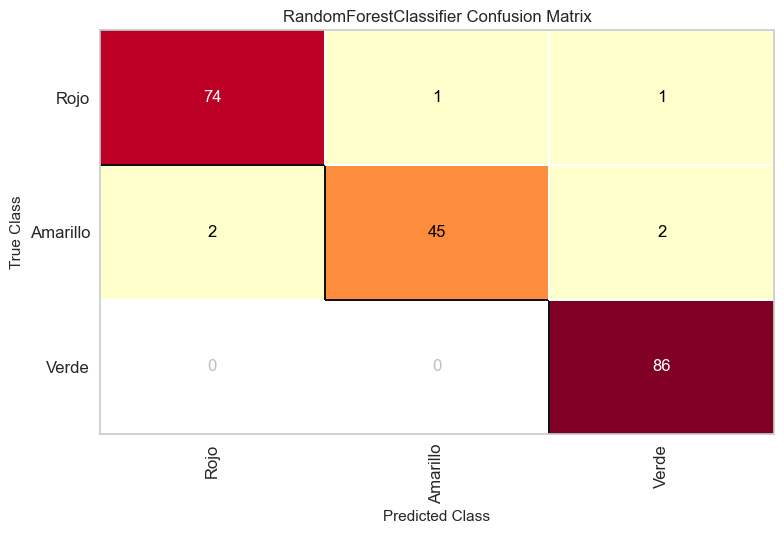

<Figure size 800x550 with 0 Axes>

In [24]:
rf = RandomForestClassifier()
pipe_model = Pipeline(steps=[('ct',columnasTransformer),('model',rf)])
pipe_model.fit(X_train,y_train)
y_pred = pipe_model.predict(X_test)
# Generate the confusion matrix and classification report
print(classification_report(y_test, y_pred))

# Instantiate the visualizer with the classification model
cm(
    pipe_model,
    X_train, y_train, X_test, y_test,
    classes=['Rojo', 'Amarillo','Verde']
)
plt.tight_layout()

<AxesSubplot:>

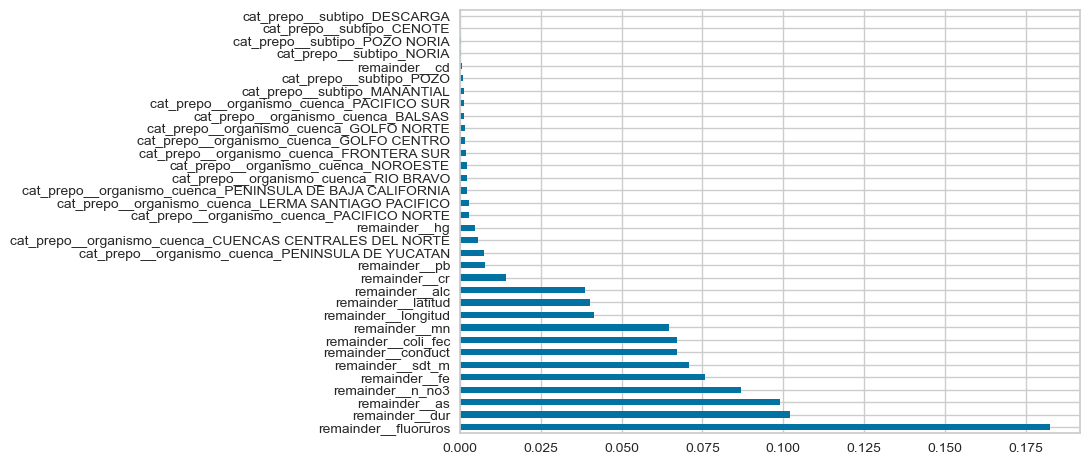

In [25]:
feat_importances = pd.Series(
    pipe_model[1].feature_importances_, index=pipe_model[0].get_feature_names_out())
feat_importances.nlargest(60).plot(kind='barh')

En la imagen anterior podemos observar que las variables relacionadas con los componentes químicos que contiene el agua son las más relevantes al predecir al semaforo. A continuación realizaremos un recursive feature elimination para seleccionar las más importantes de manera automática:


## Seleccion de variables

In [26]:
# Create the RFE with a LogisticRegression estimator and 3 features to select
from sklearn.feature_selection import RFE
rfe = RFE(estimator=rf, n_features_to_select=15, verbose=0)

# Fits the eliminator to the data
rfe.fit(X_train_transform, y_train.values)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(pipe_model[0].get_feature_names_out(), rfe.ranking_)))

# Print the features that are not eliminated
print(pipe_model[0].get_feature_names_out()[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(columnasTransformer.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.") 

{'cat_prepo__organismo_cuenca_BALSAS': 10, 'cat_prepo__organismo_cuenca_CUENCAS CENTRALES DEL NORTE': 2, 'cat_prepo__organismo_cuenca_FRONTERA SUR': 9, 'cat_prepo__organismo_cuenca_GOLFO CENTRO': 11, 'cat_prepo__organismo_cuenca_GOLFO NORTE': 13, 'cat_prepo__organismo_cuenca_LERMA SANTIAGO PACIFICO': 5, 'cat_prepo__organismo_cuenca_NOROESTE': 8, 'cat_prepo__organismo_cuenca_PACIFICO NORTE': 6, 'cat_prepo__organismo_cuenca_PACIFICO SUR': 14, 'cat_prepo__organismo_cuenca_PENINSULA DE BAJA CALIFORNIA': 7, 'cat_prepo__organismo_cuenca_PENINSULA DE YUCATAN': 3, 'cat_prepo__organismo_cuenca_RIO BRAVO': 4, 'cat_prepo__subtipo_CENOTE': 19, 'cat_prepo__subtipo_DESCARGA': 20, 'cat_prepo__subtipo_MANANTIAL': 15, 'cat_prepo__subtipo_NORIA': 17, 'cat_prepo__subtipo_POZO': 12, 'cat_prepo__subtipo_POZO NORIA': 18, 'remainder__longitud': 1, 'remainder__latitud': 1, 'remainder__alc': 1, 'remainder__conduct': 1, 'remainder__sdt_m': 1, 'remainder__fluoruros': 1, 'remainder__dur': 1, 'remainder__coli_fec'

C:\Users\Prada\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Vemos que seleccionando solo 15 variables podemos mantener la precisión del modelo, por lo cual seguiremos con estas.

In [27]:
soporte = pipe_model[0].get_feature_names_out()[rfe.support_]
variables_seleccionadas = [word.replace('remainder__','') for word in soporte]
X_train = X_train[variables_seleccionadas]
X_test = X_test[variables_seleccionadas]
variables_seleccionadas 

['longitud',
 'latitud',
 'alc',
 'conduct',
 'sdt_m',
 'fluoruros',
 'dur',
 'coli_fec',
 'n_no3',
 'as',
 'cr',
 'hg',
 'pb',
 'mn',
 'fe']

## Modelos

In [28]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
models = [('Regresión Logística', LogisticRegression()), ('Arbol de Decisión',DecisionTreeClassifier()), ('Bosque Aleatorio', RandomForestClassifier())]
resultados = dict()

for nombre, model in models:
  scoresSin = cross_validate(model, X_train, y_train,        
                           scoring='accuracy',
                           cv=cv,                                       
                           n_jobs=-1,   # trata de usar todos los recursos a los cuales tengamos acceso y en dado caso aplicar paralelización.
                           return_train_score = True
                           )
  resultados[nombre] = scoresSin
  

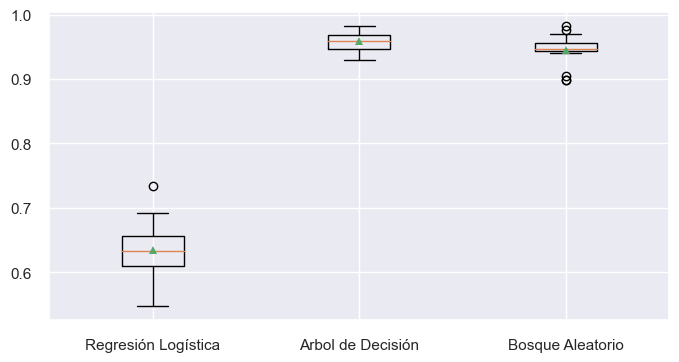

In [29]:
import seaborn as sns  
sns.set(rc={'figure.figsize':(8,4)})
bpRecall = list()
for i in resultados:
  rr = resultados[i]['test_score']
  bpRecall.append(rr)

plt.boxplot(bpRecall, labels=resultados.keys(), showmeans=True)
plt.show()

En la gráfica anterior podemos ver que el modelo que està presentando el mejor desempeño es el Arbol de Decisiòn, dado que tiene un accuracy alto y tiene poca vanrianza entre diferentes muestras el data set.

In [30]:
mejor_modelo = DecisionTreeClassifier()
mejor_modelo.fit(X_train, y_train)

DecisionTreeClassifier()

C:\Users\Prada\anaconda3\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


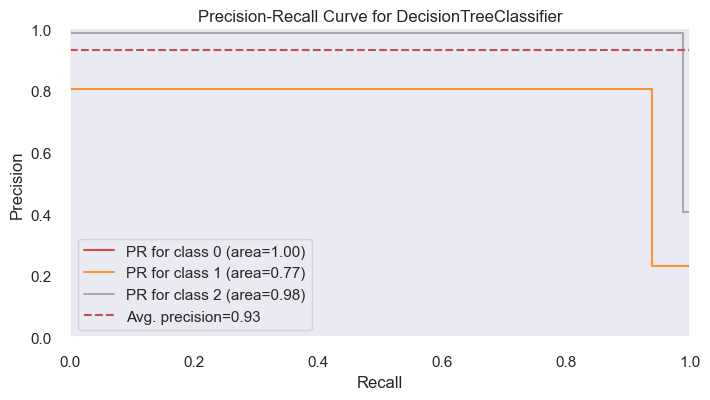

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        76
           1       0.98      0.92      0.95        49
           2       0.97      1.00      0.98        86

    accuracy                           0.97       211
   macro avg       0.97      0.96      0.97       211
weighted avg       0.97      0.97      0.97       211



In [31]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    mejor_modelo,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
print(classification_report(y_test, y_pred))


Podemos ver en la curva precision recall que el modelo está teniendo un buen desempeño para las 3 clases. De igual forma todas las métricas estan muy balanceadas y en un nivel alto en los diferentes niveles del semaforo. Por lo cual podemos concluir que logramos obteber un buen modelo capaz de modelar este problema de manera precisa.

C:\Users\Prada\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


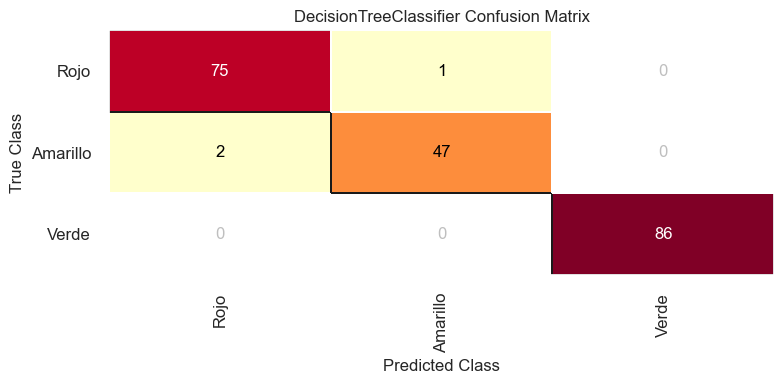

ConfusionMatrix(ax=<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['Rojo', 'Amarillo', 'Verde'],
                cmap=<matplotlib.colors.ListedColormap object at 0x000001F5DA7184F0>,
                estimator=DecisionTreeClassifier())

In [32]:
cm(
    mejor_modelo,
    X_train, y_train, X_test, y_test,
    classes=['Rojo', 'Amarillo','Verde']
)

En la matriz de confusion, tambièn podemos observar que el modelo mantiene su nivel de desempeño en el data set de prueba, mostrando muy buenos resultados.